In [ ]:
!nvidia-smi

Thu Mar 27 10:01:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

In [ ]:
# Model setup
model_id = "stabilityai/stable-diffusion-2"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    revision="fp16",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:242: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
prompt = "realistic photo of 3d cartoon style of a cat in a space suit with milky way background"

In [ ]:
def txt2img(prompt):

  image = pipe(prompt, height=768, width=768, guidance_scale = 10).images[0]

  image.save("sd_image.png")

  return image

  0%|          | 0/50 [00:00<?, ?it/s]

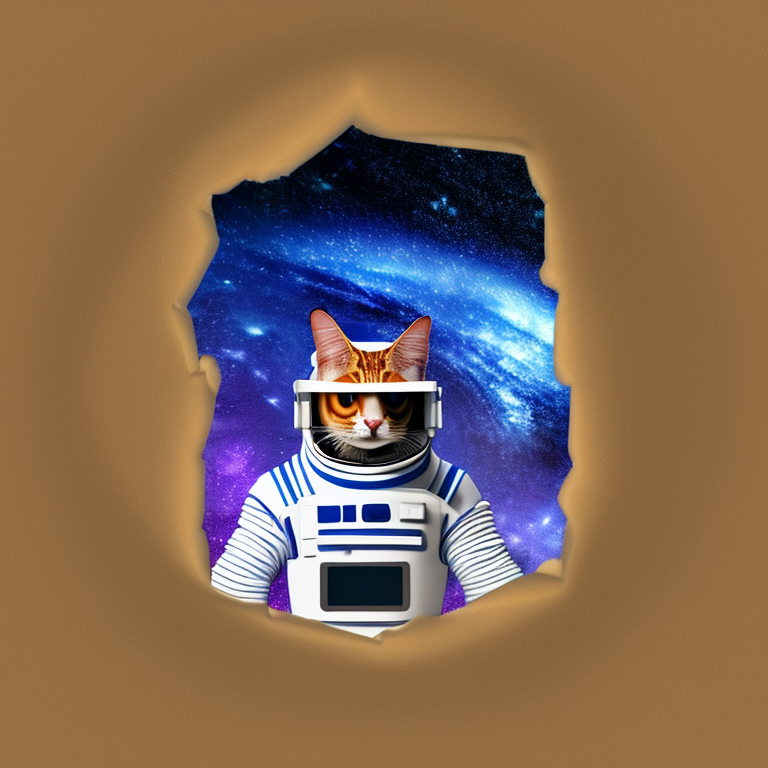

In [ ]:
txt2img(prompt)

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.3 MB/s eta 0:00:00


In [ ]:
# Image generation function
def generate_images(prompt, num_images=1):
    """Generate images based on text prompt."""
    try:
        image_paths = []
        for i in range(int(num_images)):
            image = pipe(prompt, height=768, width=768, guidance_scale=10).images[0]
            file_path = f"generated_image_{i + 1}.png"
            image.save(file_path)
            image_paths.append(file_path)
        return image_paths
    except Exception as e:
        return f"Error generating images: {str(e)}"

In [ ]:
# Example prompts
example_prompts = [
    ["realistic photo of 3d cartoon style of a cat in a space suit with milky way background", 1],
    ["futuristic cyberpunk cityscape at night with neon signs", 2],
    ["serene mountain landscape with crystal clear lake", 1]
]

In [ ]:
# Custom CSS and JavaScript
custom_script = """
<style>
body {
    margin: 0;
    font-family: 'Helvetica Neue', Arial, sans-serif;
    background: #0A0A0B !important;
    color: #E0E0E0 !important;
    height: 100vh;
    overflow-x: hidden;
}
.container {
    max-width: 1280px;
    margin: 20px auto;
    background: #14141E !important;
    border-radius: 12px;
    padding: 30px;
    box-shadow: 0 8px 24px rgba(0, 0, 0, 0.5);
    border: 1px solid #2A2A3A;
}
h1 {
    color: #FEBE10 !important;
    text-align: center;
    font-size: 2.2em;
    margin-bottom: 20px;
    letter-spacing: 1px;
    text-transform: uppercase;
}
.input-box textarea {
    background: #1E1E2A !important;
    border: 1px solid #404060 !important;
    border-radius: 8px;
    padding: 12px;
    color: #E0E0E0 !important;
    font-size: 1em;
    transition: border-color 0.3s, box-shadow 0.3s;
}
.input-box textarea:focus {
    border-color: #FFD700 !important;
    box-shadow: 0 0 8px rgba(255, 215, 0, 0.3) !important;
}
.slider {
    --track-color: #404060 !important;
    --thumb-color: #FFD700 !important;
}
button.button {
    background: linear-gradient(90deg, rgba(0,255,252,1) 0%, rgba(10,154,219,1) 12%, rgba(112,100,225,1) 52%, rgba(255,0,237,1) 100%) !important;
    border: none !important;
    padding: 12px 24px !important;
    border-radius: 8px !important;
    color: #0A0A0B !important;
    font-weight: 600 !important;
    text-transform: uppercase !important;
    letter-spacing: 1px !important;
    cursor: pointer !important;
    transition: all 0.3s ease !important;
}
button.button:hover {
    background: rgba(0, 0, 0, 0.7) !important; /* hover */
    box-shadow: 0 0 12px rgba(255, 215, 0, 0.5) !important;
    color: #E0E0E0 !important;
}
.gallery {
    background: #1E1E2A !important;
    border-radius: 10px;
    padding: 15px;
    border: 1px solid #404060;
    margin-top: 20px;
}
.gallery img {
    border-radius: 8px !important;
    border: 1px solid #404060 !important;
    transition: all 0.3s ease !important;
}
.browser-default .gallery img:hover {
    border-color: #FFD700 !important;
    box-shadow: 0 0 12px rgba(255, 215, 0, 0.2) !important;
}
.status-text {
    color: #FFD700 !important;
    text-align: center;
    font-size: 0.9em;
    margin-top: 20px;
}
</style>

<script>
document.addEventListener('DOMContentLoaded', () => {
    const button = document.querySelector('button.button');
    if (button) {
        button.addEventListener('click', () => {
            button.style.transform = 'scale(0.98)';
            setTimeout(() => {
                button.style.transform = 'scale(1)';
            }, 100);
            const status = document.querySelector('.status-text');
            if (status) status.textContent = 'Processing...';
        });
    }

    const input = document.querySelector('.input-box textarea');
    if (input) {
        input.addEventListener('input', (e) => {
            if (e.target.value.length > 0) {
                input.style.boxShadow = '0 0 8px rgba(255, 215, 0, 0.3)';
            } else {
                input.style.boxShadow = 'none';
            }
        });
    }

    const observer = new IntersectionObserver((entries) => {
        entries.forEach(entry => {
            if (entry.isIntersecting) {
                entry.target.style.opacity = 0;
                entry.target.style.transition = 'opacity 0.5s ease';
                setTimeout(() => {
                    entry.target.style.opacity = 1;
                }, 100);
                observer.unobserve(entry.target);
            }
        });
    }, { threshold: 0.1 });

    document.querySelectorAll('.gallery img').forEach(img => {
        observer.observe(img);
    });
});
</script>
"""

In [ ]:
# Gradio interface
import gradio as gr
with gr.Blocks(title="AI Image Generation") as demo:
    gr.HTML(f"""
        <div>
            {custom_script}
            <div class="container">
                <h1>Prompt to Image Generator</h1>
    """)


    # Prompt and results row at the top
    with gr.Row():
        with gr.Column(scale=1):
            prompt_input = gr.Textbox(
                label="Prompt",
                placeholder="Enter your Imagination...",
                elem_classes="input-box"
            )
            num_images_input = gr.Slider(
                minimum=1,
                maximum=5,
                step=1,
                value=1,
                label="Image Count",
                elem_classes="slider"
            )
            generate_btn = gr.Button(
                "Generate",
                elem_classes="button"
            )
        with gr.Column(scale=2):
            output_gallery = gr.Gallery(
                label="Generated Images",
                elem_classes="gallery",
                columns=2,
                object_fit="cover",
                height="auto"
            )

    gr.HTML('<div class="status-text"></div>')

    gr.Examples(
        examples=example_prompts,
        inputs=[prompt_input, num_images_input],
        outputs=output_gallery,
        fn=generate_images,
        cache_examples=False,
        label="Example Prompts"
    )

    generate_btn.click(
        fn=generate_images,
        inputs=[prompt_input, num_images_input],
        outputs=output_gallery
    ).then(
        fn=lambda: gr.update(value="Ready"),
        inputs=None,
        outputs=gr.HTML(elem_classes="status-text")
    )

    gr.HTML("</div></div>")

In [ ]:
# Launch the interface
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://2ef1302c684a88a219.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
